# data exploration

In [2]:
# import package
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
#import plotly
import os
import seaborn as sns

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [100]:
pwd

'D:\\dev\\flu-vaccine-learning\\model-1'

In [107]:
#Read data
train_df=pd.read_csv('..\\data\\train-features\\train_set_features.csv',index_col='respondent_id')
test_df=pd.read_csv('..\\data\\test-features\\test_set_features.csv',index_col='respondent_id')
train_df_label = pd.read_csv('..\\data\\train-features\\training_set_labels.csv',index_col='respondent_id')

In [109]:
#Check data
train_df.info()
train_df.head()

test_df.info()
test_df.head()

train_df_label.info()
train_df_label.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26708 entries, 26707 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26623 non-null  float64
 1   h1n1_knowledge               26586 non-null  float64
 2   behavioral_antiviral_meds    26629 non-null  float64
 3   behavioral_avoidance         26495 non-null  float64
 4   behavioral_face_mask         26689 non-null  float64
 5   behavioral_wash_hands        26668 non-null  float64
 6   behavioral_large_gatherings  26636 non-null  float64
 7   behavioral_outside_home      26626 non-null  float64
 8   behavioral_touch_face        26580 non-null  float64
 9   doctor_recc_h1n1             24548 non-null  float64
 10  doctor_recc_seasonal         24548 non-null  float64
 11  chronic_med_condition        25776 non-null  float64
 12  child_under_6_months         25895 non-null  float64
 13  health_worke

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [110]:
#respondents distribution by gender
##--train_df['sex']
male_respondents = train_df.loc[train_df.sex=='Male',:]
print('Number of male respondents : {0}'.format(len(male_respondents)))

female_respondents = train_df.loc[train_df.sex=='Female',:]
print('Number of female respondents : {0}'.format(len(female_respondents)))

##---OR

train_df.sex.value_counts()
train_df.sex.value_counts(normalize= True) # to show proportion


Number of male respondents : 10849
Number of female respondents : 15858


Female    15858
Male      10849
Name: sex, dtype: int64

Female    0.593777
Male      0.406223
Name: sex, dtype: float64

In [111]:
#fetch the summary statistics for all variables
train_df.describe(include='all')

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,2,3,10,3,NaN,NaN,21,23
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


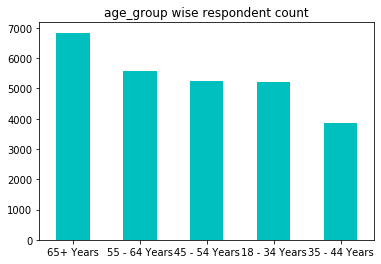

In [112]:
#View distribution by age_group
train_df.age_group.value_counts().plot(kind='bar',rot=0,title ='age_group wise respondent count',color='c');# improve aesthetics of the graph
#use semicolon at the end to supress the matplotlib text above the graph

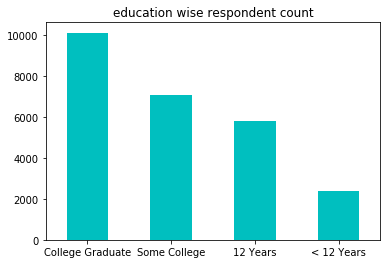

In [113]:
#View distribution by education
train_df.education.value_counts().plot(kind='bar',rot=0,title ='education wise respondent count',color='c');# improve aesthetics of the graph

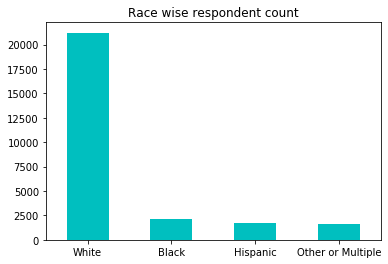

In [114]:
#View distribution by race
train_df.race.value_counts().plot(kind='bar',rot=0,title ='Race wise respondent count',color='c');# improve aesthetics of the graph

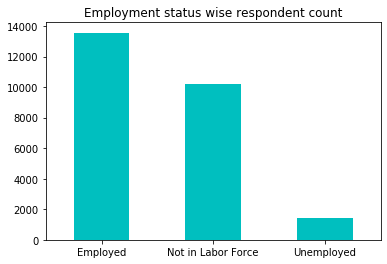

In [115]:
#View distribution by employment_status
train_df.employment_status.value_counts().plot(kind='bar',rot=0,title ='Employment status wise respondent count',color='c');# improve aesthetics of the graph
#use semicolon at the end to supress the matplotlib text above the graph

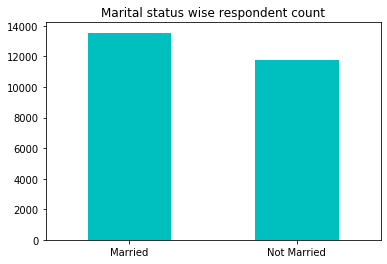

In [116]:
#View distribution by marital_status
train_df.marital_status.value_counts().plot(kind='bar',rot=0,title ='Marital status wise respondent count',color='c');# improve aesthetics of the graph


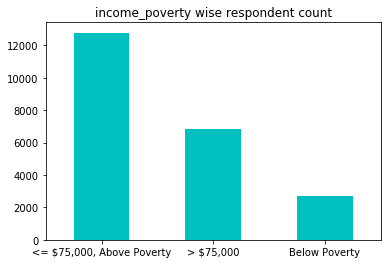

In [117]:
#View distribution by income_poverty
train_df.income_poverty.value_counts().plot(kind='bar',rot=0,title ='income_poverty wise respondent count',color='c');# improve aesthetics of the graph

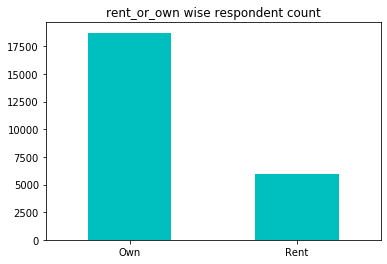

In [118]:
#View distribution by rent_or_own
train_df.rent_or_own.value_counts().plot(kind='bar',rot=0,title ='rent_or_own wise respondent count',color='c');# improve aesthetics of the graph

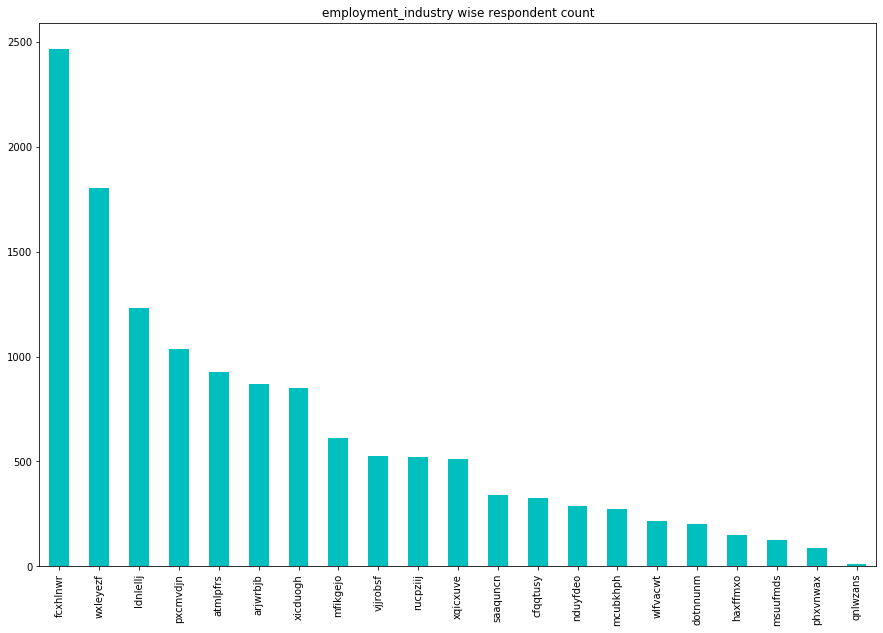

In [119]:
#View distribution by employment_industry
train_df.employment_industry.value_counts().plot(kind='bar',rot=90,title ='employment_industry wise respondent count',color='c',figsize=(15,10));# improve aesthetics of the graph

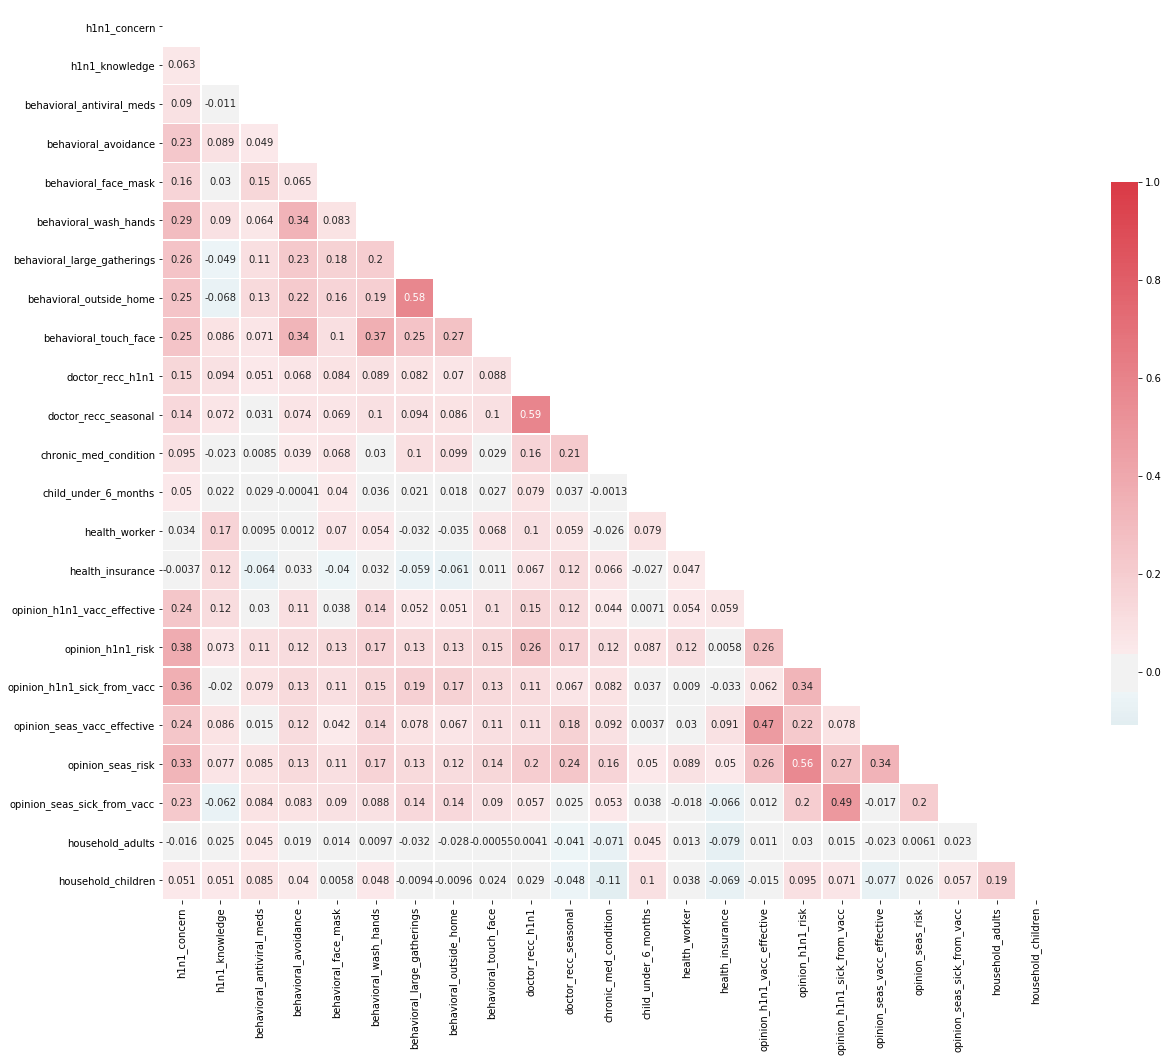

In [120]:
#create correlation matrix
train_corr=train_df.corr()
#plot sizing
ax = plt.subplots(figsize=(20,20))
#mask upper triangle of the matrix
mask = np.triu(train_corr)
#adding diverging pallettes for plot
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#heatmap plot
sns.heatmap(train_corr, annot=True, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 0.5});

In [186]:
#check missing values
train_df.isnull().sum()
train_df_label.isnull().sum()
test_df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
marital_status                  1442
r

In [187]:
#Impute missing values
feature= train_corr.columns
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
train_df_with_imputed_values = my_imputer.fit_transform(train_df[feature])
test_df_with_imputed_values = my_imputer.transform(test_df[feature])



In [188]:
#check data
train_df_with_imputed_values
test_df_with_imputed_values

array([[1., 0., 0., ..., 2., 0., 0.],
       [3., 2., 0., ..., 4., 0., 0.],
       [1., 1., 0., ..., 2., 2., 0.],
       ...,
       [2., 2., 0., ..., 2., 0., 0.],
       [1., 1., 0., ..., 2., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

array([[2., 2., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 1., 3., 0.],
       [2., 2., 0., ..., 4., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [3., 1., 0., ..., 2., 1., 0.],
       [2., 1., 0., ..., 2., 0., 0.]])

In [189]:
#normalize dataset
from sklearn.preprocessing import StandardScaler
scale_function=StandardScaler()
x = scale_function.fit_transform(train_df_with_imputed_values) 

# Note: fit_transform() is used on the training data so that we can scale the training data and 
# also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance 
# of the features of the training set. These learned parameters are then used to scale our test data.

y=scale_function.transform(test_df_with_imputed_values) 

In [190]:
#Check mean= 0 and std dev =1
np.nanmean(x),np.nanstd(x)
np.nanmean(y),np.nanstd(y)

(4.018528710158366e-17, 1.0000000000000002)

(0.003412863237344985, 0.9988931822891722)

In [239]:
test_df.index

Int64Index([26707, 26708, 26709, 26710, 26711, 26712, 26713, 26714, 26715,
            26716,
            ...
            53405, 53406, 53407, 53408, 53409, 53410, 53411, 53412, 53413,
            53414],
           dtype='int64', name='respondent_id', length=26708)

In [240]:
#create dataframe from standardized values
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
train_df_normalized = pd.DataFrame(x,columns=feat_cols)
train_df_normalized.tail()

feat_cols = ['feature'+str(i) for i in range(y.shape[1])]
test_df_normalized = pd.DataFrame(y,columns=feat_cols,index=test_df.index)
test_df_normalized.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22
26702,0.419835,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,1.403796,-1.452107,-0.554462,...,-0.360462,9.285508e-16,-0.850610,-1.052050,-1.003729,0.904289,-0.524309,-0.089516,-1.182177,-0.578667
26703,-0.680609,1.195647,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,-1.452107,1.962251,...,2.860323,5.029891e-01,0.149375,-0.268439,-0.264426,0.904289,-1.253366,-0.847404,0.151357,-0.578667
26704,0.419835,1.195647,-0.226911,0.617345,3.675062,0.459948,1.339461,-0.714548,0.691971,-0.554462,...,-0.360462,9.285508e-16,0.149375,1.298784,-0.264426,0.904289,0.933803,-0.089516,-1.182177,-0.578667
26705,-0.680609,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,0.000000,-0.554462,...,-0.360462,-3.678832e+00,-0.850610,-1.052050,-0.264426,-1.880954,-1.253366,-0.089516,0.151357,-0.578667
26706,-1.781053,-2.046928,-0.226911,0.617345,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,-0.554462,...,-0.360462,5.029891e-01,1.149360,-1.052050,-1.003729,0.904289,-1.253366,-0.847404,0.151357,-0.578667


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22
respondent_id,,,,,,,,,,,,,,,,,,,,,
53410,-0.680609,-0.425641,-0.226911,0.617345,-0.272298,0.459948,-0.749009,-0.714548,0.691971,1.962251,...,-0.360462,9.285508e-16,0.149375,-0.268439,-0.264426,-0.024126,-0.524309,-0.847404,0.151357,0.503797
53411,1.520279,-0.425641,-0.226911,0.617345,-0.272298,0.459948,1.339461,1.403796,0.691971,-0.554462,...,2.860323,-3.678832e+00,0.149375,-1.052050,-1.003729,0.904289,-0.524309,-0.089516,0.151357,2.668723
53412,-1.781053,-0.425641,-0.226911,-1.632555,-0.272298,-2.177583,-0.749009,-0.714548,-1.452107,-0.554462,...,-0.360462,5.029891e-01,0.149375,0.515173,-1.003729,-0.024126,0.204747,-0.847404,0.151357,-0.578667
53413,1.520279,-0.425641,-0.226911,0.617345,-0.272298,0.459948,-0.749009,1.403796,-1.452107,-0.554462,...,-0.360462,9.285508e-16,-1.850595,0.515173,1.214180,-0.024126,0.204747,-0.089516,0.151357,-0.578667
53414,0.419835,-0.425641,-0.226911,-1.632555,-0.272298,0.459948,-0.749009,-0.714548,0.691971,1.962251,...,-0.360462,5.029891e-01,1.149360,-1.052050,-0.264426,0.904289,0.933803,-0.089516,-1.182177,-0.578667


In [241]:
# Perform PCA with fixed components
from sklearn.decomposition import PCA
pca_function = PCA(n_components=2)
#pca_function2.explained_variance_ratio_
#pca = PCA(.95) -to retain 95% of the variance
#pca.n_components_ - to find number of components
principalComponents_fluvaccine = pca_function.fit_transform(train_df_normalized)


In [242]:
#Convert into dataframe
principalComponents_fluvaccine_df = pd.DataFrame(data = principalComponents_fluvaccine
            , columns = ['principal component 1', 'principal component 2'])

In [243]:
#Check data
principalComponents_fluvaccine_df.tail()

,principal component 1,principal component 2
26702,-1.882676,0.772205
26703,-0.389160,-2.859618
26704,1.828580,0.324177
26705,-3.549147,1.323995
26706,-3.105108,-0.736042


In [244]:
print('Explained variation per principal component: {}'.format(pca_function.explained_variance_ratio_))
#pca_function gets the attribute explained_variance_ratio_ only after the function is applied to the dataset

Explained variation per principal component: [0.15787477 0.08032276]


In [245]:
#merge train data and label in one dataframe
train_dataset= pd.merge(train_df,train_df_label,on='respondent_id')
train_dataset.head()
#change the label values to label names
train_dataset['h1n1_vaccine'].replace(0, 'Received',inplace=True)
train_dataset['h1n1_vaccine'].replace(1, 'Not_received',inplace=True)
train_dataset['seasonal_vaccine'].replace(0, 'Received',inplace=True)
train_dataset['seasonal_vaccine'].replace(1, 'Not_received',inplace=True)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


<Figure size 432x288 with 0 Axes>

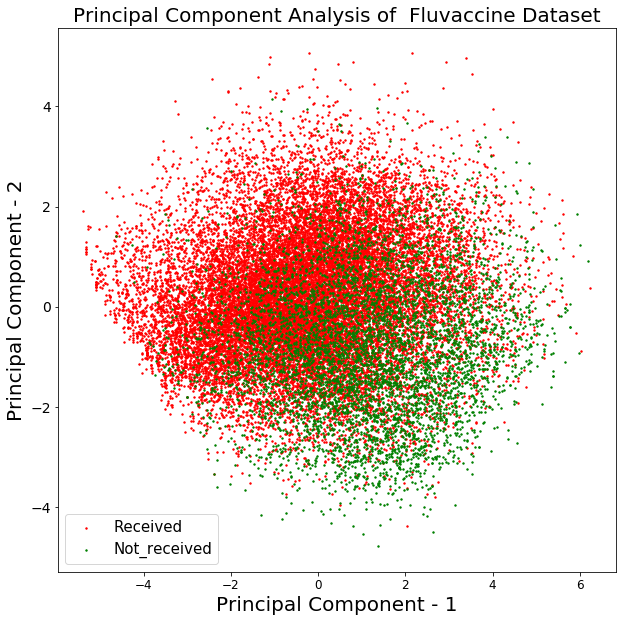

In [246]:
#Visualize the principle component graph
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of  Fluvaccine Dataset",fontsize=20)
targets = ['Received', 'Not_received']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = train_dataset['h1n1_vaccine'] == target
    plt.scatter(principalComponents_fluvaccine_df.loc[indicesToKeep, 'principal component 1']
               , principalComponents_fluvaccine_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 2)

plt.legend(targets,prop={'size': 15});



In [197]:
# Alternatively , Perform PCA with fixed variance
# pca = PCA(0.9)
# pca.fit(x)
# pca.n_components_
# train_pca = pca.transform(x)

In [249]:
#Apply PCA in test dataset
principalComponents_fluvaccine_test = pca_function.transform(test_df_normalized)

In [250]:
#import library for logistic regression
from sklearn.linear_model import LogisticRegression

In [273]:
# Make an instance of the model
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr_1 = LogisticRegression(solver = 'lbfgs')
logisticRegr_2 = LogisticRegression(solver = 'lbfgs')

In [274]:
#Training the model on the data
model_h1n1_vaccine= logisticRegr_1.fit(principalComponents_fluvaccine, train_df_label['h1n1_vaccine'])
model_seasonal_vaccine= logisticRegr_2.fit(principalComponents_fluvaccine, train_df_label['seasonal_vaccine'])

In [286]:
#Predict the labels of new data
result_h1n1_vaccine=model_h1n1_vaccine.predict_proba(principalComponents_fluvaccine_test)[:,1]
result_seasonal_vaccine=model_seasonal_vaccine.predict_proba(principalComponents_fluvaccine_test)[:,1]


In [287]:
#Check results
result_h1n1_vaccine
result_seasonal_vaccine

result_h1n1_vaccine.sum()
result_seasonal_vaccine.sum()

array([0.12391675, 0.03165327, 0.24505206, ..., 0.11159591, 0.08698896,
       0.36389029])

array([0.39840529, 0.13864382, 0.59524971, ..., 0.37373053, 0.30973071,
       0.7209572 ])

5653.580521520191

12437.522339010904

In [288]:
test_df.index

Int64Index([26707, 26708, 26709, 26710, 26711, 26712, 26713, 26714, 26715,
            26716,
            ...
            53405, 53406, 53407, 53408, 53409, 53410, 53411, 53412, 53413,
            53414],
           dtype='int64', name='respondent_id', length=26708)

In [290]:
#Convert into dataframe
result_h1n1_vaccine_df = pd.DataFrame(result_h1n1_vaccine,index=test_df.index,columns=['h1n1_vaccine'])
result_seasonal_vaccine_df = pd.DataFrame(result_seasonal_vaccine,index=test_df.index,columns=['seasonal_vaccine'])
result_h1n1_vaccine_df.tail()
result_seasonal_vaccine_df.tail()

,h1n1_vaccine
respondent_id,
53410,0.288816
53411,0.061228
53412,0.111596
53413,0.086989
53414,0.363890


,seasonal_vaccine
respondent_id,
53410,0.649237
53411,0.236311
53412,0.373731
53413,0.309731
53414,0.720957


In [291]:
#merge results and create dataframe for submission
submission_dataset= pd.merge(result_h1n1_vaccine_df,result_seasonal_vaccine_df,on='respondent_id')

In [292]:
#Check data
submission_dataset.tail()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
53410,0.288816,0.649237
53411,0.061228,0.236311
53412,0.111596,0.373731
53413,0.086989,0.309731
53414,0.363890,0.720957


In [293]:
#Write to csv
submission_dataset.to_csv('submission.csv')